# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 02/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 5 [here](https://www.nltk.org/book/ch05.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. Processing Raw Text
4. Writing Structured Programs
5. Categorizing and Tagging Words
    1. Using a Tagger
    1. Tagged Corpora
    1. Mapping Words to Properties Using Python Dictionaries
    1. Automatic Tagging
    1. [N-Gram Tagging](#ngram)
        1. [Unigram Tagging](#unigram)
        1. [Seperating the Training and Testing Data](#traintest)
        1. [General N-Gram Tagging](#genngram)
        1. [Combining Taggers](#combiningtaggers)
        1. [Tagging Unknown Words](#unknownwords)
        1. [Storing Taggers](#storingtaggers)
        1. [Performance Limitations](#perflimitations)

<a name="ngram"></a>
# 5.5 N-Gram Tagging

<a name="unigram"></a>
## 5.5.1 Unigram Tagging

Unigram taggers are based on a __simple statistical algorithm__: for each token, assign the tag that is most likely for that particular token. 

For example, it will assign the tag `JJ` to any occurrence of the word `frequent`, since frequent is used as an adjective (e.g. a frequent word) more often than it is used as a verb (e.g. I frequent this cafe). 

A unigram tagger behaves just __like a lookup tagger, except there is a more convenient technique for setting it up__, called __training__.

In [4]:
from nltk import UnigramTagger
from nltk.corpus import brown

# obtain tagged sents as baseline
brown_tagged_sents = brown.tagged_sents(categories='news')

# obtain sents to tag
brown_sents = brown.sents(categories='news')

# instantiate tagger with tagged sents
unigram_tagger = UnigramTagger(brown_tagged_sents)

# use tagger to tag sents
unigram_tagger.tag(brown_sents[2007])

# evaluate tag relative to tagged sents
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

We train a UnigramTagger by __specifying tagged sentence data as a parameter when we initialize the tagger__. 

The training process involves __inspecting the tag of each word and storing the most likely tag__ for any word in a dictionary, stored inside the tagger.

<a name="traintest"></a>
## 5.5.2 Seperating the Training and Testing Data

Now that we are training a tagger on some data, we must be careful __not to test it on the same data__, as we did in the above example. 

A tagger that simply __memorized its training data__ and made no attempt to construct a general model would get a perfect score, but would also be useless for tagging new text. 

Instead, we should __split the data__, training on 90% and testing on the remaining 10%.

In [15]:
# extract the 90% of tagged sents
size = int(len(brown_tagged_sents) * 0.9)
print("The 90% of brown_tagged_sents correspond to {} sentences.\n"
      .format(size))

# assign as training set up until 90% of total
train_sents = brown_tagged_sents[:size]

# assign as test test the rest
test_sents = brown_tagged_sents[size:]
print("The 10% of brown_tagged_sents correspond to {} sentences.\n"
      .format(len(test_sents)))

# instantiate tagger using training data
unigram_tagger = UnigramTagger(train_sents)

# evaluate tagger using test data
unigram_tagger.evaluate(test_sents)

The 90% of brown_tagged_sents correspond to 4160 sentences.

The 10% of brown_tagged_sents correspond to 463 sentences.



0.8121200039868434

Although the score is worse, we now have a __better picture of the usefulness of this tagger__, i.e. its __performance on previously unseen text__.

<a name="genngram"></a>
## 5.5.3 General N-Gram Tagging

When we perform a language processing task based on unigrams, we are using __one item of context__. In the case of tagging, we only consider the current token, __in isolation from any larger context__. 

Given such a model, the best we can do is tag each word with its a priori most likely tag. This means we would tag a word such as `wind` with the same tag, regardless of whether it appears in the context `the wind` or `to wind`.

An __n-gram tagger__ is a __generalization of a unigram tagger__ whose context is the current word together with the POS tags of the $n-1$ preceding tokens, as shown in the figure below. 

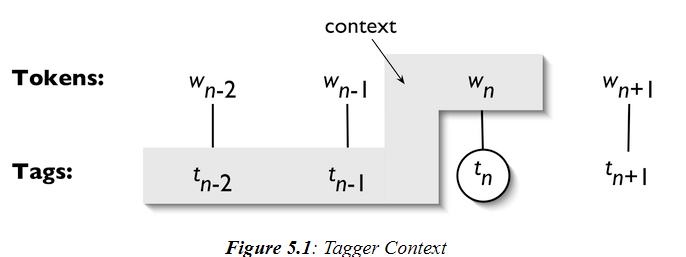

The tag to be chosen, $t_n$, is circled, and the context is shaded in grey.

In this example of an n-gram tagger, we have __n=3__; that is, we consider the tags of the __two preceding words in addition to the current word__.

An n-gram tagger picks the tag that is most likely in the given context.

A __1-gram tagger__ is another term for a __unigram tagger__: i.e., the context used to tag a token is just the text of the token itself. __2-gram taggers__ are also called __bigram__ taggers, and __3-gram__ taggers are called __trigram__ taggers.

The `NgramTagger` class uses a tagged training corpus to determine which POS tag is most likely for each context. 

Here we see a special case of an n-gram tagger, namely a __bigram tagger__. First we train it, then use it to tag untagged sentences.

In [34]:
from nltk import BigramTagger

# instantiate tagger
bigram_tagger = BigramTagger(train_sents)

# tag an already seen sent
print(bigram_tagger.tag(brown_sents[2007]), "\n")

# obtain a new sent
unseen_sent = brown_sents[4203]

# tag an unseen sent
print(bigram_tagger.tag(unseen_sent), "\n")

# evalute tagger
print("Tagger's Score on unseen sentence: {:.2%}.\n"
      .format(bigram_tagger.evaluate(test_sents)))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')] 

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)] 

Tagger's Score on unseen sentence: 10.21%.



Notice that the bigram tagger __manages to tag every word in a sentence it saw during training, but does badly on an unseen sentence__. 

As soon as it encounters a new word (i.e., 13.5), it is __unable to assign a tag__. It cannot tag the following word (i.e., million) even if it was seen during training, simply because it never saw it during training with a `None` tag on the previous word. 

Consequently, the tagger fails to tag the rest of the sentence. __Its overall accuracy is very low__.

As $n$ gets larger, the specificity of the contexts increases, as does the chance that the data we wish to tag contains contexts that were not present in the training data. 

This is known as the __sparse data problem__, and is quite pervasive in NLP. 

As a consequence, there is a __trade-off between the accuracy and the coverage of our results__ (and this is related to the __precision/recall trade-off in information retrieval__).

__Caution!__

__n-gram taggers should not consider context that crosses a sentence boundary__. 

Accordingly, __NLTK taggers are designed to work with lists of sentences__, where each sentence is a list of words. At the start of a sentence, $t_{n-1}$ and preceding tags are set to `None`.

<a name="combiningtaggers"></a>
## 5.5.4 Combining Taggers

One way to address the trade-off between accuracy and coverage is to __use the more accurate algorithms when we can, but to fall back on algorithms with wider coverage when necessary__. 

For example, we could combine the results of a bigram tagger, a unigram tagger, and a default tagger, as follows:

1. Try tagging the token with the bigram tagger.
2. If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
3. If the unigram tagger is also unable to find a tag, use a default tagger.


Most __NLTK taggers permit a backoff-tagger to be specified__. 

The backoff-tagger may itself have a backoff tagger.

In [40]:
from nltk import DefaultTagger, TrigramTagger

# define a sequence of taggers
t0 = DefaultTagger('NN')
t1 = UnigramTagger(train_sents, backoff=t0)
t2 = BigramTagger(train_sents, backoff=t1)
t3 = TrigramTagger(train_sents, backoff=t2)

# evalute performance
print("t1:", t1.evaluate(test_sents))
print("t2:", t2.evaluate(test_sents))
print("t3:", t3.evaluate(test_sents))

t1: 0.8361407355726104
t2: 0.8452108043456593
t3: 0.843317053722715


Note that we __specify the backoff tagger when the tagger is initialized__ so that training can take advantage of the backoff tagger.

Thus, if the bigram tagger would assign the same tag as its unigram backoff tagger in a certain context, the bigram tagger discards the training instance. This keeps the bigram tagger model as small as possible. 

We can further specify that a tagger needs to see more than one instance of a context in order to retain it, e.g. `nltk.BigramTagger(sents, cutoff=2, backoff=t1)` will discard contexts that have only been seen once or twice.

<a name="unknownwords"></a>
## 5.5.5 Tagging Unknown Words

Our approach to tagging unknown words still uses backoff to a regular-expression tagger or a default tagger. These are unable to make use of context. 

Thus, if our tagger encountered the word `blog`, not seen during training, it would assign it the same tag, regardless of whether this word appeared in the context `the blog` or `to blog`. How can we do better with these unknown words, or out-of-vocabulary items?

A useful method to tag unknown words based on context is to __limit the vocabulary of a tagger to the most frequent $n$ words__, and to __replace every other word with a special word `UNK`__. 

During training, __a unigram tagger will probably learn that `UNK` is usually a noun__. However, the n-gram taggers will detect contexts in which it has some other tag. 

For example, if the preceding word is `to` (tagged `TO`), then `UNK` will probably be tagged as a `verb`.

<a name="storingtaggers"></a>
## 5.5.6 Storing Taggers

Training a tagger on a large corpus may __take a significant time__.

Instead of training a tagger every time we need one, it is convenient to __save a trained tagger__ in a file for later re-use. 

Let's save our tagger `t2` to a file `t2.pkl`.

In [44]:
from pickle import dump

# create a file in write mode
output = open('t2.pkl', 'wb')

# write t2 to the file 
dump(t2, output, -1)

# close file
output.close()

Now, in a separate Python process, we can __load our saved tagger__.

In [45]:
from pickle import load

# open file in read mode
input = open('t2.pkl', 'rb')

# assign contents to a var
tagger = load(input)

# close file
input.close()

Now let's __check that it can be used for tagging__.

In [47]:
# create text
text = """The board's action shows what free enterprise is up against in our
complex maze of regulatory laws."""

# tokenize text
tokens = text.split()

# tag text
print(tagger.tag(tokens))

[('The', 'AT'), ("board's", 'NN$'), ('action', 'NN'), ('shows', 'NNS'), ('what', 'WDT'), ('free', 'JJ'), ('enterprise', 'NN'), ('is', 'BEZ'), ('up', 'RP'), ('against', 'IN'), ('in', 'IN'), ('our', 'PP$'), ('complex', 'JJ'), ('maze', 'NN'), ('of', 'IN'), ('regulatory', 'NN'), ('laws.', 'NN')]


<a name="perflimitations"></a>
## 5.5.7 Performance Limitations

What is the __upper limit to the performance__ of an n-gram tagger?

Consider the case of a trigram tagger. How many __cases of POS ambiguity__ does it encounter? 

We can determine the answer to this question __empirically__.

In [52]:
from nltk import ConditionalFreqDist, trigrams

# create cfd
cfd = ConditionalFreqDist(
        ((x[1], y[1], z[0]), z[1])
        for sent in brown_tagged_sents
        for x, y, z in trigrams(sent))
    
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
    
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

Thus, __one out of twenty trigrams is ambiguous__. 

Given the current word and the previous two tags, in __5% of cases there is more than one tag that could be legitimately assigned to the current word according to the training data__. 

Assuming we always pick the most likely tag in such ambiguous contexts, we can derive a lower bound on the performance of a trigram tagger.

Another way to investigate the performance of a tagger is to __study its mistakes__. Some tags may be harder than others to assign, and it might be possible to __treat them specially by pre- or post-processing the data__.

A convenient way to look at tagging errors is the __confusion matrix__. It charts expected tags (the gold standard) against actual tags generated by a tagger.

In [60]:
# from nltk.metrics import ConfusionMatrix

# test_tags = [tag for sent in brown.sents(categories='editorial')
#             for (word, tag) in t2.tag(sent)]

# gold_tags = [tag for (word, tag) in
#             brown.tagged_words(categories='editorial')]

# print(ConfusionMatrix(gold_tags, test_tags))

The code below comes for [here](https://stackoverflow.com/questions/23704361/how-to-use-the-confusion-matrix-module-in-nltk) and demonstrates a proper usage of the CM.

In [59]:
from collections import Counter
from nltk.metrics import ConfusionMatrix

ref  = 'DET NN VB DET JJ NN NN IN DET NN'.split()
tagged = 'DET VB VB DET NN NN NN IN DET NN'.split()
cm = ConfusionMatrix(ref, tagged)

print(cm)

labels = set('DET NN VB IN JJ'.split())

true_positives = Counter()
false_negatives = Counter()
false_positives = Counter()

for i in labels:
    for j in labels:
        if i == j:
            true_positives[i] += cm[i,j]
        else:
            false_negatives[i] += cm[i,j]
            false_positives[j] += cm[i,j]

print("TP:", sum(true_positives.values()), true_positives)
print("FN:", sum(false_negatives.values()), false_negatives)
print("FP:", sum(false_positives.values()), false_positives)
print() 

for i in sorted(labels):
    if true_positives[i] == 0:
        fscore = 0
    else:
        precision = true_positives[i] / float(true_positives[i]+false_positives[i])
        recall = true_positives[i] / float(true_positives[i]+false_negatives[i])
        fscore = 2 * (precision * recall) / float(precision + recall)
    print(i, fscore)

    | D         |
    | E I J N V |
    | T N J N B |
----+-----------+
DET |<3>. . . . |
 IN | .<1>. . . |
 JJ | . .<.>1 . |
 NN | . . .<3>1 |
 VB | . . . .<1>|
----+-----------+
(row = reference; col = test)

TP: 8 Counter({'DET': 3, 'NN': 3, 'VB': 1, 'IN': 1, 'JJ': 0})
FN: 2 Counter({'JJ': 1, 'NN': 1, 'VB': 0, 'IN': 0, 'DET': 0})
FP: 2 Counter({'VB': 1, 'NN': 1, 'IN': 0, 'DET': 0, 'JJ': 0})

DET 1.0
IN 1.0
JJ 0
NN 0.75
VB 0.6666666666666666


Based on such analysis we may decide to __modify the tagset__. Perhaps a distinction between tags that is difficult to make can be dropped, since it is not important in the context of some larger processing task.

Another way to analyze the performance bound on a tagger comes from the __less than 100% agreement between human annotators__.

In general, observe that __the tagging process collapses distinctions__: e.g. __lexical identity is usually lost__ when all personal pronouns are tagged `PRP`. 

At the same time, __the tagging process introduces new distinctions and removes ambiguities__: e.g. `deal` tagged as `VB` or `NN`. 

This characteristic of collapsing certain distinctions and introducing new distinctions is an important feature of tagging which __facilitates classification and prediction__. 

When we introduce finer distinctions in a tagset, an n-gram tagger gets more detailed information about the __left-context__ when it is deciding what tag to assign to a particular word. 

However, the tagger simultaneously has to do more work to classify the current token, simply because there are more tags to choose from.

Conversely, with fewer distinctions (as with the simplified tagset), the tagger has less information about context, and it has a smaller range of choices in classifying the current token.

We have seen that __ambiguity in the training data leads to an upper limit in tagger performance__. 

Sometimes __more context__ will resolve the ambiguity. In other cases however, the ambiguity can only be resolved with __reference to syntax__, or __to world knowledge__. 

Despite these imperfections, POS tagging has played a central role in the rise of statistical approaches to natural language processing. In the early 1990s, the surprising accuracy of statistical taggers was a striking demonstration that it was possible to solve one small part of the language understanding problem, namely __POS disambiguation__, without reference to deeper sources of linguistic knowledge.